In [ ]:
import pandas as pd
df=pd.read_csv(r"C:\Users\MY Laptop\Desktop\guvi_class\mental health survey\train.csv") 

In [ ]:
df.head()  

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 20 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     140700 non-null  int64  
 1   Name                                   140700 non-null  object 
 2   Gender                                 140700 non-null  object 
 3   Age                                    140700 non-null  float64
 4   City                                   140700 non-null  object 
 5   Working Professional or Student        140700 non-null  object 
 6   Profession                             104070 non-null  object 
 7   Academic Pressure                      27897 non-null   float64
 8   Work Pressure                          112782 non-null  float64
 9   CGPA                                   27898 non-null   float64
 10  Study Satisfaction                     27897 non-null   

In [6]:
df.shape

(140700, 20)

In [32]:
df.isna().sum()

id                                           0
Name                                         0
Gender                                       0
Age                                          0
City                                         0
Working Professional or Student              0
Profession                               36630
Academic Pressure                            9
Work Pressure                            27918
CGPA                                         9
Study Satisfaction                          10
Job Satisfaction                         27910
Sleep Duration                               0
Dietary Habits                               4
Degree                                       2
Have you ever had suicidal thoughts ?        0
Work/Study Hours                             0
Financial Stress                             4
Family History of Mental Illness             0
Depression                                   0
dtype: int64

In [7]:
for col in df.columns:
  print(f"{col}:\n Unique values:",df[col].nunique(),"\n", df[col].unique())
  print()

id:
 Unique values: 140700 
 [     0      1      2 ... 140697 140698 140699]

Name:
 Unique values: 422 
 ['Aaradhya' 'Vivan' 'Yuvraj' 'Rhea' 'Vani' 'Ritvik' 'Rajveer' 'Aishwarya'
 'Simran' 'Utkarsh' 'Aahana' 'Tejas' 'Aadhya' 'Kiran' 'Aditi' 'Suhani'
 'Jiya' 'Bhavesh' 'Armaan' 'Ishaani' 'Prachi' 'Pratyush' 'Abhinav'
 'Siddhesh' 'Aditya' 'Aarav' 'Asha' 'Kashish' 'Prisha' 'Chhavi' 'Tanmay'
 'Vihaan' 'Shiv' 'Anvi' 'Darsh' 'Samar' 'Raunak' 'Mahi' 'Shaurya' 'Vidya'
 'Jai' 'Ayush' 'Ansh' 'Anand' 'Yashvi' 'Shrey' 'Ritika' 'Mihir' 'Isha'
 'Arjun' 'Rohan' 'Pratham' 'Nirvaan' 'Ishaan' 'Aarya' 'Riya' 'Aariv'
 'Raghavendra' 'Mahika' 'Abhishek' 'Harshil' 'Janvi' 'Kartikeya' 'Shivam'
 'Advait' 'Reyansh' 'Saanvi' 'Ivaan' 'Pallavi' 'Sneha' 'Ayaan' 'Aakash'
 'Raghav' 'Satyam' 'Aarush' 'Vibha' 'Rupal' 'Sanya' 'Mira' 'Rashi' 'Shlok'
 'Harsha' 'Divya' 'Pranav' 'Hrithik' 'Tushar' 'Garima' 'Zoya' 'Kian'
 'Navya' 'Lakshay' 'Kriti' 'Palak' 'Aryan' 'Parth' 'Ishan' 'Rupak'
 'Atharv' 'Aarti' 'Anirudh' 'Kabir' 'S

In [8]:
df['Working Professional or Student'].value_counts()

Working Professional or Student
Working Professional    112799
Student                  27901
Name: count, dtype: int64

In [71]:
# filling nan value to zero (0) the CGPA,Academic Pressure,Study Satisfaction for professional 
df.loc[df['Working Professional or Student'] == 'Working Professional', 'CGPA'] = 0.0
df.loc[df['Working Professional or Student'] == 'Working Professional', 'Academic Pressure'] = 0.0
df.loc[df['Working Professional or Student'] == 'Working Professional', 'Study Satisfaction'] = 0

In [72]:
df['Profession']=df[['Profession']].fillna(df['Profession'].mode()[0])
df['Degree']=df[['Degree']].fillna(df['Degree'].mode()[0])
df['Dietary Habits']=df[['Dietary Habits']].fillna(df['Dietary Habits'].mode()[0])
df['Work Pressure'] = df[['Work Pressure']].fillna(df['Work Pressure'].median())
df['Academic Pressure'] = df[['Academic Pressure']].fillna(df['Academic Pressure'].median())
df['Job Satisfaction'] = df[['Job Satisfaction']].fillna(df['Job Satisfaction'].median())
df['Financial Stress'] = df[['Financial Stress']].fillna(df['Financial Stress'].median())
df['CGPA'] = df[['CGPA']].fillna(df['CGPA'].median())
df['Study Satisfaction'] = df[['Study Satisfaction']].fillna(df['Study Satisfaction'].median())


In [75]:
df.drop(['id','Name','City'],axis=1,inplace=True)

In [45]:
df.select_dtypes(include=['object']).columns

Index(['Gender', 'Working Professional or Student', 'Profession',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?',
       'Family History of Mental Illness'],
      dtype='object')

In [ ]:
da=df.select_dtypes(include=['object']).columns


for col in da:
  print(f"{col}:\n Unique values:",df[col].nunique(),"\n", df[col].unique())
  print()

Gender:
 Unique values: 2 
 ['Female' 'Male']

Working Professional or Student:
 Unique values: 2 
 ['Working Professional' 'Student']

Profession:
 Unique values: 11 
 ['Others' 'Teacher' 'Business Analyst' 'Chemist' 'Entrepreneur'
 'HR Manager' 'Content Writer' 'Pharmacist' 'Architect' 'Consultant'
 'Doctor']

Sleep Duration:
 Unique values: 6 
 ['More than 8 hours' 'Less than 5 hours' '5-6 hours' '7-8 hours' 'Others'
 '3-4 hours']

Dietary Habits:
 Unique values: 4 
 ['Healthy' 'Unhealthy' 'Moderate' 'Others']

Degree:
 Unique values: 11 
 ['Others' 'B.Pharm' 'BBA' 'MCA' 'BSc' 'B.Arch' 'BCA' 'B.Ed' 'B.Com'
 'Class 12' 'M.Ed']

Have you ever had suicidal thoughts ?:
 Unique values: 2 
 ['No' 'Yes']

Family History of Mental Illness:
 Unique values: 2 
 ['No' 'Yes']



In [67]:
# df['Profession'].value_counts().head(10)
# df['Sleep Duration'].value_counts().head(10)
df['Degree'].value_counts().head(10)



Degree
Class 12    14731
B.Ed        11691
B.Arch       8742
B.Com        8113
B.Pharm      5856
BCA          5739
M.Ed         5668
MCA          5234
BBA          5030
BSc          5027
Name: count, dtype: int64

In [73]:
allowed_profession=['Teacher','Content Writer','Architect','Consultant','HR Manager','Pharmacist','Doctor','Business Analyst','Entrepreneur','Chemist']
df['Profession'] = df['Profession'].where(df['Profession'].isin(allowed_profession), 'Others')
allowed_sleepduration=['Less than 5 hours','7-8 hours','More than 8 hours','5-6 hours','3-4 hours']
df['Sleep Duration'] = df['Sleep Duration'].where(df['Sleep Duration'].isin(allowed_sleepduration), 'Others')
allowed_habits=['Moderate','Unhealthy','Healthy']
df['Dietary Habits'] = df['Dietary Habits'].where(df['Dietary Habits'].isin(allowed_habits), 'Others')
allowed_degree=['Class 12'  ,'B.Ed' ,'B.Arch','B.Com','B.Pharm','BCA','M.Ed','MCA','BBA' ,'BSc']
df['Degree'] = df['Degree'].where(df['Degree'].isin(allowed_degree), 'Others')

In [77]:
nominal_data=['Gender','Working Professional or Student','Profession','Degree','Sleep Duration','Dietary Habits'] #OHC
ordinal_data=['Family History of Mental Illness', 'Have you ever had suicidal thoughts ?']
df['Family History of Mental Illness']=df['Family History of Mental Illness'].replace({'No':0,'Yes':1})
df['Have you ever had suicidal thoughts ?']=df['Have you ever had suicidal thoughts ?'].replace({'No':0,'Yes':1})
df=pd.get_dummies(df,columns=nominal_data,dtype='int')

C:\Users\MY Laptop\AppData\Local\Temp\ipykernel_1656\144849397.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Family History of Mental Illness']=df['Family History of Mental Illness'].replace({'No':0,'Yes':1})
C:\Users\MY Laptop\AppData\Local\Temp\ipykernel_1656\144849397.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Have you ever had suicidal thoughts ?']=df['Have you ever had suicidal thoughts ?'].replace({'No':0,'Yes':1})


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 47 columns):
 #   Column                                                Non-Null Count   Dtype  
---  ------                                                --------------   -----  
 0   Age                                                   140700 non-null  float64
 1   Academic Pressure                                     140700 non-null  float64
 2   Work Pressure                                         140700 non-null  float64
 3   CGPA                                                  140700 non-null  float64
 4   Study Satisfaction                                    140700 non-null  float64
 5   Job Satisfaction                                      140700 non-null  float64
 6   Have you ever had suicidal thoughts ?                 140700 non-null  int64  
 7   Work/Study Hours                                      140700 non-null  float64
 8   Financial Stress                            

In [81]:
da=df.select_dtypes(include=['float64']).columns
da

Index(['Age', 'Academic Pressure', 'Work Pressure', 'CGPA',
       'Study Satisfaction', 'Job Satisfaction', 'Work/Study Hours',
       'Financial Stress'],
      dtype='object')

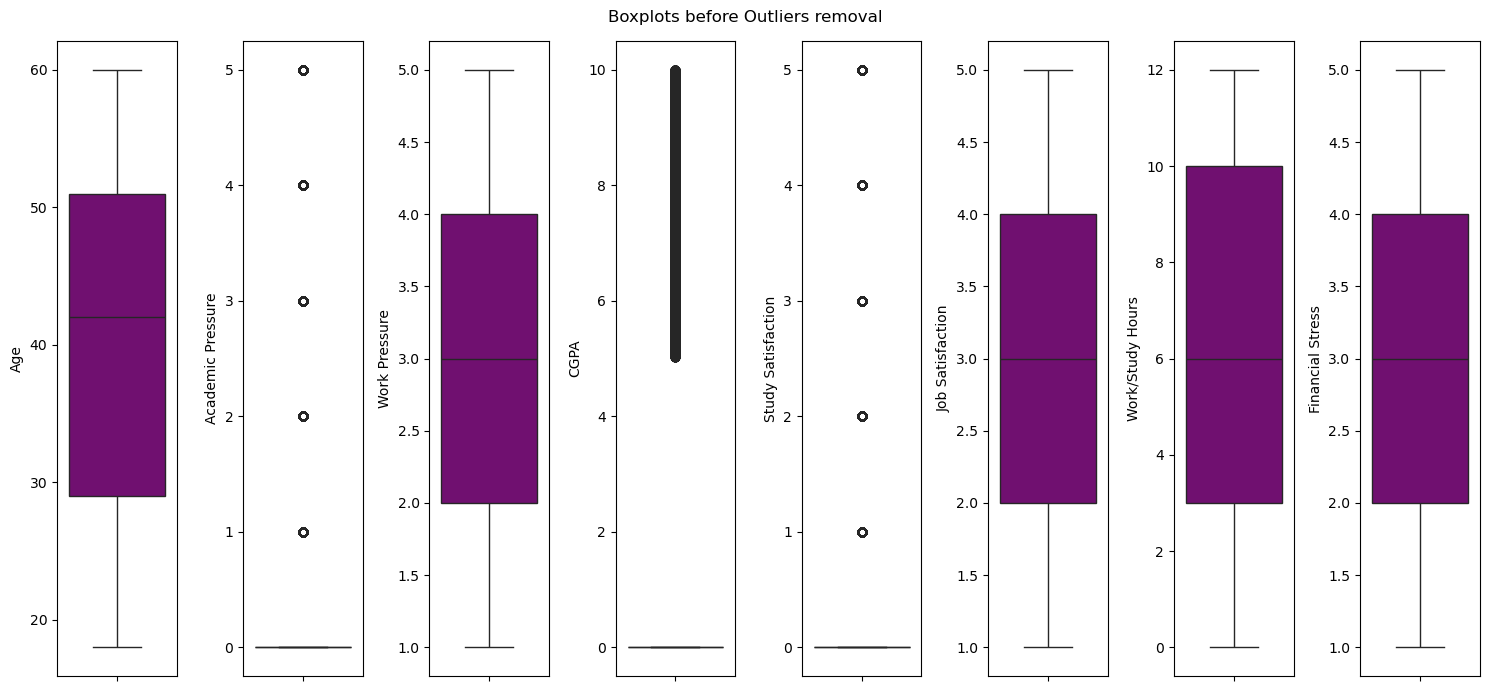

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 7))
plt.suptitle("Boxplots before Outliers removal")
for i in range(0, len(da)):
    plt.subplot(1, 8, i+1)
    sns.boxplot(y=df[da[i]],color='purple',)
    plt.tight_layout()

In [83]:
import numpy as np
outliers=['Academic Pressure','CGPA',
       'Study Satisfaction',]
for col in outliers:

    Q1 = df[col].quantile(0.25)  # 25th percentile
    Q3 = df[col].quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1  # Interquartile range

    # Define lower and upper bound
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap values at lower and upper bound
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

In [85]:
skewness = df[da].skew()
skewness


Age                  -0.217977
Academic Pressure     0.000000
Work Pressure         0.020206
CGPA                  0.000000
Study Satisfaction    0.000000
Job Satisfaction      0.048697
Work/Study Hours     -0.128169
Financial Stress      0.035603
dtype: float64

In [ ]:
import matplotlib.pyplot as plt
df1=pd.read_csv(r"C:\Users\MY Laptop\Desktop\guvi_class\mental health survey\train.csv")
y1 = df1['Depression']
count=y1.value_counts()
count.plot(kind='bar', color=['salmon', 'skyblue'])
plt.title('Distribution of Conversion Labels')
plt.xticks(ticks=[0,1], labels=['Not Converted', 'Converted'], rotation=0)
plt.ylabel('Count')
plt.show()
